# Week 5 - Modern Digital Technologies in Text Analysis

# Exploring and Processing Text Data

We are going to cover various methods and techniques to preprocess the text data along with exploratory data analysis.

We are going to discuss the following concepts under text preprocessing and exploratory data analysis.

1. Lowercasing
2. Punctuation removal
3. Stop words removal
4. Text standardization
5. Spelling correction
6. Tokenization
7. Stemming
8. Lemmatization
9. Exploratory data analysis
10. End-to-End processing pipeline

Why do we need to preprocessing the text data?

Around 90% of the world's data is unstructured and may be present in the form of an image, text, audio, and video.

Text can come in variety of forms from a list of individual words, to sentences to multiple paragraphs with special characters (like tweets and other punctuations). It also may be present in the form of web, HTML, documents, etc.

This data is never clean and consists of a lot of noise. It needs to be treated and then perform a few of the preprocessing functions to make sure we have the right input data for the feature engineering and model building.

Suppose if we don’t preprocess the data, any algorithms that are built on top of such data will not add any value for the business. This reminds me of a very popular phrase in the Data Science world `“Garbage in – Garbage out.”`

Preprocessing involves transforming raw text data into an understandable format. Real-world data is very often incomplete, inconsistent, and filled with a lot of noise and is likely to contain many errors. Preprocessing is a proven method of resolving such issues.

Data preprocessing prepares raw text data for further processing.

In [ ]:
text = ['This is introduction to NLP',
       'It is likely to be useful, to people ',
       'Machine learning is the new concept',
       'There would be less hype around AI and more action going forward',
       'python is the best tool!',
       'Python is good langauage',
       'I like this course',
       'I want more lectures like this']

# Convert list to data frame
import pandas as pd

df = pd.DataFrame({'tweet': text})
df

### Step 1-2 Execute lower() function on the text data
When there is just the string, apply the `.lower()` function directly:

In [ ]:
x = 'Testing'
x2 = x.lower()
print(x2)

- When you want to perform lowercasing on a data frame, use the `apply` function:

Lambda Function description: [lambda function](https://www.w3schools.com/python/python_lambda.asp)

In [ ]:
df['tweet'] = df['tweet'].apply(lambda x : " ".join(x.lower() for x in x.split()))
df['tweet']

That’s all. We have converted the whole tweet column into lowercase.

## 2. Removing Punctuation

We are going to discuss how to remove punctuation from the text data. This step is very important as punctuation doesn’t add any extra information or value. Hence removal of all such instances will help reduce the size of the data and increase computational efficiency.

### Problem
You want to remove punctuation from the text data.

### Solution
The simplest way to do this is by using the `regex` and `replace()` function in Python.

### How It Works
Let’s follow the steps in this section to remove punctuation from the text data.

### Step 2-1 Read/create the text data
Let’s create a list of strings and assign it to a variable.

In [ ]:
text = ['This is introduction to NLP',
        'It is likely to be useful, to people',
        'Machine Leaning is a new concept',
        'There would be less hype around AI and more action going forward',
        'Python is the best tool!',
        'I like this course',
        'I want more lectures like this']

# Convert list to data frame
import pandas as pd

df = pd.DataFrame({'tweet': text})
df

### Step 2-2 Execute below function on the text data
Using the `regex` and `replace()` function, we can remove the punctuation as shown below:

1. `\w` --> alpha numeric
2. `\s` --> white space

RegEx Description: [RegEx](https://www.w3schools.com/python/python_regex.asp)

In [ ]:
import re

s = 'I. like. This book!#'
s1 = re.sub(r'[^\w\s]', "", s)
s1

In [ ]:
# Or let's do it on our text
df['tweet'] = df['tweet'].str.replace('[^\w\s]', "")
df['tweet']

In [ ]:
# Or let's do it by replace() function
import string

s = 'I. like. This book!#'
for c in string.punctuation:
    s = s.replace(c, "")
    
s

In [ ]:
# Or let's do it on our text
for i in range(len(df['tweet'])):
    for c in string.punctuation:
        df['tweet'][i] = df['tweet'][i].replace(c, "")
        
df['tweet']

## 3. Removing Stop Words
In the context of a search engine, if your search query is `“How to develop chatbot using python”`, if the search engine tries to find web pages that contained the terms `“how”`, `“to”`, `“develop”`, `“chatbot”`, `“using”`, `“python”`, the search engine is going to find a lot more pages that contain the terms `“how”` and `“to”` than pages that contain information about developing chatbot because the terms `“how”` and `“to”` are so commonly used in the English language.

So, if we remove such terms, the search engine can actually focus on retrieving pages that contain the keywords: `“develop”`, `“chatbot”`, `“python”` – which would more closely bring up pages that are of real interest. Similarly we can remove more common words and rare words as well.


### Problem
You want to remove stop words.

### Solution
The simplest way to do this by using the `NLTK` library.

### How It Works
Let’s follow the steps in this section to remove stop words from the text data.

### Step 3-1 Read/create the text data
Let’s create a list of strings and assign it to a variable.

In [ ]:
text = ['This is introduction to NLP',
        'It is likely to be useful, to people',
        'Machine Leaning is a new concept',
        'There would be less hype around AI and more action going forward',
        'Python is the best tool!',
        'I like this course',
        'I want more lectures like this']

# Convert list to data frame
import pandas as pd

df = pd.DataFrame({'tweet': text})
df

### Step 3-2 Execute below commands on the text data
Using the NLTK library, we can remove the punctuation as shown below.

In [ ]:
import nltk
from nltk.corpus import stopwords

# Remove stop words
stop = stopwords.words('english')

df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x.lower() not in stop))
df['tweet']

## 4. Standardizing Text
We are going to discuss how to standardize the text. But before that, let’s understand what is text standardization and why we need to do it.

Most of the text data is in the form of either customer reviews, blogs, or tweets, where there is a high chance of people using short words and abbreviations to represent the same meaning.

This may help the downstream process to easily understand and resolve the semantics of the text.

### Problem
You want to standardize text.

### Solution
We can write our own custom dictionary to look for short words and abbreviations.

### How It Works
Let’s follow the steps in this section to perform text standardization.

### Step 4-1 Create a custom lookup dictionary
The dictionary will be for text standardization based on your data.

In [ ]:
lookup_dict = {'nlp': 'natural language processing',
               'ur': 'your',
               'wbu': 'what about you',
               'btw': 'by the way',
               'asap': 'as soon as possible',
               'lmk': 'let me know',
               'brb': 'be right back',
               'dob': 'date of birth',
               'eta': 'estimate time of arrival',
               'tba': 'to be announced',
               'tbc': 'to be confirmed'}

import re

### Step 4-2 Create a custom function for text standardization

In [ ]:
def text_std(input_text):
    
    words = input_text.split()
    new_words = []
    
    for word in words:
        word = re.sub(r'[^\w\s]', "", word)
        
        if word.lower() not in lookup_dict:
            new_words.append(word)
        else:
            word = lookup_dict[word.lower()]
            new_words.append(word)
    
    new_text = " ".join(new_words)
    return new_text

### Step 4-3 Run the text_std function

In [ ]:
text_std("I like NlP it's ur choice btw I like it. \
          I want to learn it asap. Could you please tell me your eta?")

- Here, `nlp` has standardised to `'natural language processing'`
- `ur` to `'your'`
- `btw` to `by the way`
- `asap` to `as soon as possible`
- `eta` to `estimate time of arrival`


## 5. Correcting Spelling
We are going to discuss how to do spelling correction. But before that, let’s understand why this spelling correction is important. Most of the text data is in the form of either customer reviews, blogs, or tweets, where there is a high chance of people using short words and making typo errors.

This will help us in reducing multiple copies of words, which represents the same meaning. For example, `“proccessing”` and `“processing”` will be treated as different words even if they are used in the same sense.

- **Warning**: Note that abbreviations should be handled before this step, or else the corrector would fail at times. Say, for example, “**ur**” (actually means “**your**”) would be corrected to “**or**.”


### Problem
You want to do spelling correction.

### Solution
The simplest way to do this by using the `TextBlob` library.

### How It Works
Let’s follow the steps in this section to do spelling correction.

### Step 5-1 Read/create the text data
Let’s create a list of strings and assign it to a variable.

In [ ]:
text = ['This is introduction to NLP',
        'It is likely to be useful, to people',
        'Machine Leaning is a new conccept',
        'There would be less hype around AI and more action going forward',
        'Python is good langauage',
        'I like this course',
        'I want more lectures like this']

# Convert list to data frame
import pandas as pd

df = pd.DataFrame({'tweet': text})
df

### Step 5-2 Execute below code on the text data

Using `TextBlob`, we can do spelling correction as shown below:

In [ ]:
# Install textblob library

# !pip install textblob

In [ ]:
from textblob import TextBlob

df['tweet'].apply(lambda x: str(TextBlob(x).correct()))

If you clearly observe this, it corrected the spelling of `concept` and `language`.

You can also use `autocorrect` library.

In [ ]:
# install autocorrect

# !pip install autocorrect

In [ ]:
from autocorrect import Speller

spell = Speller(lang='en')

print(spell(u'mussage'))
print(spell(u'sirvice'))
print(spell(u'Yuniversiti'))

In [ ]:
# Let's apply spell function on our data

text = ['This is introduction to NLP',
        'It is likely to be useful, to people',
        'Machine Leaning is a new conccept',
        'There would be less hype around AI and more action going forward',
        'Python is good langauage',
        'I like this course',
        'I want more lectures like this']

df = pd.DataFrame({'tweet': text})

for i in range(len(df['tweet'])):
    df['tweet'][i] = spell(df['tweet'][i])
    
print(df['tweet'])

## 6. Tokenizing Text

We would look at the ways to tokenize. Tokenization refers to splitting text into minimal meaningful units. 

There is a sentence tokenizer and word tokenizer. We will see a word tokenizer in this section, which is a mandatory step in text preprocessing for any kind of analysis. There are many libraries to perform tokenization like **NLTK**, **SpaCy**, and **TextBlob**. Here are a few ways to achieve it.


### Problem
You want to do tokenization.

### Solution
The simplest way to do this is by using the TextBlob library.

### How It Works
Let’s follow the steps in this section to perform tokenization.

### Step 6-1 Read/create the text data
Let’s create a list of strings and assign it to a variable.

In [ ]:
text = ['This is introduction to NLP',
        'It is likely to be useful, to people',
        'Machine Leaning is a new conccept',
        'There would be less hype around AI and more action going forward',
        'Python is good langauage',
        'I like this course',
        'I want more lectures like this']

df = pd.DataFrame({'tweet': text})
df

### Step 6-2 Execute below code on the text data

The result of tokenization is a list of tokens:

In [ ]:
df['tweet'][3]

In [ ]:
# using textblob
from textblob import TextBlob

list(TextBlob(df['tweet'][3]).words)

In [ ]:
# Using NLTK
import nltk

# create data
mysting = df['tweet'][6]
print(mysting)
nltk.word_tokenize(mystring)

In [ ]:
# Using split() function from python
mysting = df['tweet'][6]
print(mystring)
mysting.split()

# Normalizing Text
We converted text to lowercase before doing anything with its words, e.g. `set(w.lower() for w in text)`. By using `lower()`, we have normalized the text to lowercase so that the distinction between **The** and **the** is ignored. 

Often we want to go further than this, and strip off any **affixes**, a task known as **stemming**. A further step is to make sure that the resulting form is a known word in a dictionary, a task known as **lemmatization**. We discuss each of these in turn. First, we need to define the data we will use in this section:

## 7. Stemming
We will discuss stemming. Stemming is a process of extracting a root word. For example, `“fish,”` `“fishes,”` and `“fishing”` are stemmed into `fish`.


### Problem
You want to do stemming.

### Solution
The simplest way to do this by using `NLTK` or a `TextBlob` library.

### How It Works
Let’s follow the steps in this section to perform stemming.

### Step 7-1 Read the text data
Let’s create a list of strings and assign it to a variable.

In [ ]:
text = ['I like fishing',
        'I eat fish',
        'There are many fishes in pound']

df = pd.DataFrame({'tweet': text})
print(df)

### Step 7-2 Stemming the text

In [ ]:
from nltk.stem import PorterStemmer

st = PorterStemmer()

df['tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

If you observe this, you will notice that fish, fishing, and fishes have been stemmed to fish.

## 8. Lemmatizing

We will discuss lemmatization. Lemmatization is a process of extracting a root word by considering the vocabulary. For example, “**good**,” “**better**,” or “**best**” is lemmatized into **good**. The part of speech of a word is determined in lemmatization. It will return the dictionary form of a word, which must be a valid word while stemming just extracts the root word.

Lemmatization can get better results.

- The stemmed form of leafs is leaf.
- The stemmed form of leaves is leav.
- The lemmatized form of leafs is leaf.
- The lemmatized form of leaves is leaf.

### Problem
You want to perform lemmatization.

### Solution
The simplest way to do this is by using `NLTK` or the `TextBlob` library.

### How It Works
Let’s follow the steps in this section to perform lemmatization.

### Step 8-1 Read the text data
Let’s create a list of strings and assign it to a variable.

In [ ]:
text = ['I like fishing',
        'I eat fish',
        'There are many fishes in pound',
        'leaves and leaf']

df = pd.DataFrame({'tweet': text})
print(df)

### Step 8-2 Lemmatizing the data

In [ ]:
from textblob import Word

# Code for lemmatize
df['tweet'] = df['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['tweet']

## 9. Exploring Text Data
We are going to do some exploratory data analysis


### Problem
You want to explore and understand the text data.

### Solution
The simplest way to do this by using `NLTK` or the `TextBlob` library.

### How It Works
Let’s follow the steps in this process.

### Step 9-1 Read the text data
Download the dataset.

In [ ]:
nltk.download()

In [ ]:
# Importing data
import nltk
from nltk.corpus import webtext

nltk.download('webtext')

wt_sentences = webtext.sents('firefox.txt')

wt_words = webtext.words('firefox.txt')

### Step 9.2 Important necessary libraries

In [ ]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

### Step 9-3 Check number of words in the data

In [ ]:
len(wt_sentences)

In [ ]:
len(wt_words)

### Step 9-4 Compute the frequency of all words in the reviews

In [ ]:
frequency_dist = FreqDist(wt_words)
frequency_dist

In [ ]:
sorted_frequency_dist = sorted(frequency_dist, key=frequency_dist.__getitem__, reverse=True)
sorted_frequency_dist

### Step 9-5 Consider words with length greater than 3 and plot

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

large_words = dict([(k, v) for k, v in frequency_dist.items() if len(k)>3])

frequency_dist = nltk.FreqDist(large_words)

frequency_dist.plot(50, cumulative=False)

### Step 9-6 Build Wordcloud

In [ ]:
# install library

# !pip install wordcloud

In [ ]:
help(plt.imshow)

In [ ]:
# build wordcloud
from wordcloud import WordCloud

wcloud = WordCloud().generate_from_frequencies(frequency_dist)

# plotting the wordcloud
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Exercise
First remove stop words, then build the word cloud.

Output:

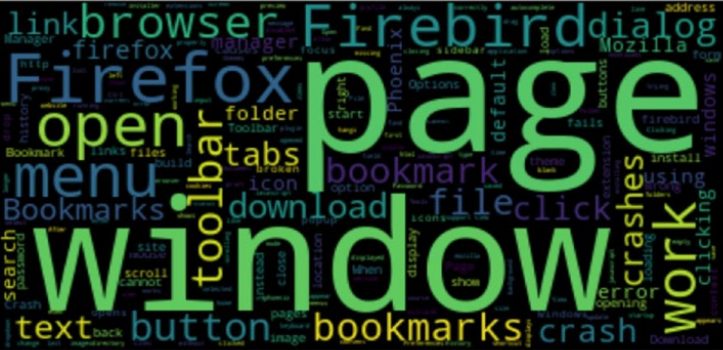

In [ ]:
<YOUR CODE>

## 10. Build a Text Preprocessing Pipeline

We have completed most of the text manipulation and processing techniques and methods. Now let’s do something interesting.

### Problem
You want to build an end-to-end text preprocessing pipeline. Whenever you want to do preprocessing for any NLP application, you can directly plug in data to this pipeline function and get the required clean text data as the output.

### Solution
The simplest way to do this by creating the custom function with all the techniques learned so far.

### How It Works
This works by putting all the possible processing techniques into a wrapper function and passing the data through it.

### Step 10-1 Read/create the text data
Let’s create a list of strings and assign it to a variable. Maybe a tweet sample:

In [ ]:
tweet_sample= "How to take control of your #debt https://\
personal.vanguard.com/us/insights/saving-investing/\
debt-management.#Best advice for #family #financial #success\
(@PrepareToWin)"

tweet_sample

You can also use your Twitter data extracted before or using some data that you downloaded.

### Step 10-2 Process the text

In [ ]:
# import required libraries

import re
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize

In [ ]:
def processRow(row):
    tweet = row
    
    # Lower case
    tweet.lower()
    
    # Removes unicode strings like "\u002c" and "x96"
    tweet = re.sub(r'(\\u[0-9A-Fa-f]+)', "r", tweet)
    tweet = re.sub(r'[^\x00-\x7f]', "r", tweet)
    
    #convert any url to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    
    #Convert any @Username to "AT_USER"
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('[\n]+', ' ', tweet)
    
    #Remove not alphanumeric symbols white spaces
    tweet = re.sub(r'[^\w]', ' ', tweet)
    
    #Removes hastag in front of a word """
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    
    #Remove :( or :)
    tweet = tweet.replace(':)',"")
    tweet = tweet.replace(':(',"")
    
    #remove numbers
    tweet = "".join([i for i in tweet if not i.isdigit()])
    
    #remove multiple exclamation
    tweet = re.sub(r"(\!)\1+", ' ', tweet)
    
    #remove multiple question marks
    tweet = re.sub(r"(\?)\1+", ' ', tweet)
    
    #remove multistop
    tweet = re.sub(r"(\.)\1+", ' ', tweet)
    
    #lemma
    tweet =" ".join([Word(word).lemmatize() for word in tweet.split()])
    
    #stemmer
#     st = PorterStemmer()
#     tweet = " ".join([st.stem(word) for word in tweet.split()])
    
    #Removes emoticons from text
    tweet = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', "", tweet)
                   
    #trim
    tweet = tweet.strip('\'"')
    
    row = tweet
    
    return row

In [ ]:
#call the function with your data

processRow(tweet_sample)

## Exercise

How to read a pdf with multiple pages as an integrated data?

In [ ]:
import PyPDF2
from PyPDF2 import PdfReader

If you want to store it as an integrated `string` or text then use the following code:

In [ ]:
# creating a pdf file object
pdf = open("paper.pdf", "rb")

# create pdf reader object
pdf_reader = PdfReader(pdf)

print(f'Number of pages are: {len(pdf_reader.pages)}', '\n\n')

my_str = ''
for i in range(len(pdf_reader.pages)):
    my_str = my_str + pdf_reader.pages[i].extract_text() + '\n'

pdf.close()

In [ ]:
my_str

If you want to store it as a list of data, each page in a `list`, then follow the following code:

In [ ]:
# creating a pdf file object
pdf = open("paper.pdf", "rb")

# create pdf reader object
pdf_reader = PdfReader(pdf)

print(f'Number of pages are: {len(pdf_reader.pages)}', '\n\n')

my_list = []
for i in range(len(pdf_reader.pages)):
    my_list.append(pdf_reader.pages[i].extract_text())

pdf.close()

In [ ]:
my_list[0]

In [ ]:
my_list[1]